In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
st = pd.read_csv("calidad_del_aire_cyl_1997_2013.csv", delimiter=";", index_col = "DIA", parse_dates = True)
st.head()

/home/david/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CO (mg/m3),NO (ug/m3),NO2 (ug/m3),O3 (ug/m3),PM10 (ug/m3),SH2 (ug/m3),PM25 (ug/m3),PST (ug/m3),SO2 (ug/m3),PROVINCIA,ESTACIÓN
DIA,,,,,,,,,,,
1997-01-01,1.2,12,33,63,56,NaN,NaN,NaN,19,ÁVILA,Ávila
1997-02-01,1.3,15,35,59,47,NaN,NaN,NaN,17,ÁVILA,Ávila
1997-03-01,1.5,18,43,54,65,NaN,NaN,NaN,19,ÁVILA,Ávila
1997-04-01,1.6,56,73,50,74,NaN,NaN,NaN,22,ÁVILA,Ávila
1997-05-01,1.4,11,33,63,54,NaN,NaN,NaN,18,ÁVILA,Ávila


In [3]:
#Obtenemos la lista de gases
st = st.sort_values(by='DIA')
gas_headers = list(st)
gas_headers.remove("PROVINCIA")
gas_headers.remove("ESTACIÓN")
#gas_headers.remove("DIA")
gas_headers

['CO (mg/m3)',
 'NO (ug/m3)',
 'NO2 (ug/m3)',
 'O3 (ug/m3)',
 'PM10 (ug/m3)',
 'SH2 (ug/m3)',
 'PM25 (ug/m3)',
 'PST (ug/m3)',
 'SO2 (ug/m3)']

In [4]:
#Aplicamos un describe a cada gas para ver nulos o informacion no numerica
for i in gas_headers:
    gas = pd.Categorical(st[i])
    print(gas.describe())

                                                    counts     freqs
categories                                                          
    0.0                                                  8  0.000052
    0.1                                               3921  0.025607
    0.2                                               3788  0.024739
    0.3                                               4018  0.026241
    0.4                                               5201  0.033967
    0.5                                               5359  0.034999
    0.6                                               5801  0.037885
    0.7                                               5763  0.037637
    0.8                                               5433  0.035482
    0.9                                               4872  0.031818
    1.0                                               4297  0.028063
    1.1                                               3838  0.025065
    1.2                           

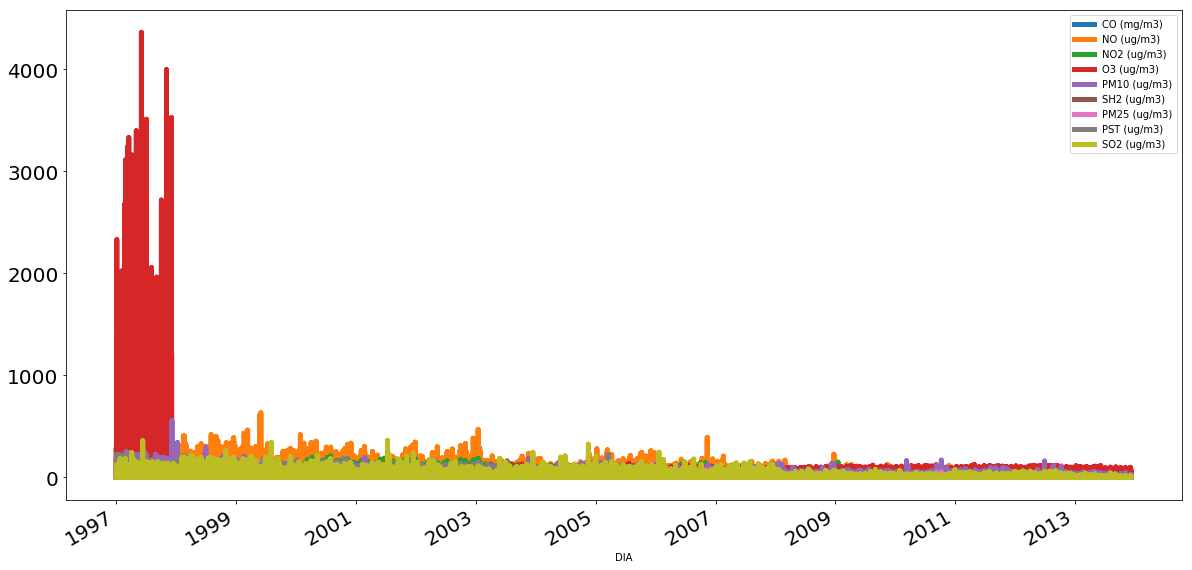

In [5]:
#Preparamos los gases para ver su comportamiento a lo largo de tiempo, se puede observar que 
#estos gases tienen un comportamiento no estacional y han descendido a lo largo de tiempo
for i in gas_headers:
    st[i] = st[i].replace("No cumple el anexo IV de la Decisión del Consejo 97/101/CE",0)
    st[i] = st[i].fillna(0)
    st[i] = st[i].astype(float)

st.plot(figsize=(20,10), linewidth=5, fontsize=20)

In [6]:
for i in gas_headers:
    gas = pd.Categorical(st[i])
    print(gas.describe())

            counts     freqs
categories                  
0.0          77427  0.505662
0.1           3921  0.025607
0.2           3788  0.024739
0.3           4018  0.026241
0.4           5201  0.033967
0.5           5359  0.034999
0.6           5801  0.037885
0.7           5763  0.037637
0.8           5433  0.035482
0.9           4872  0.031818
1.0           4297  0.028063
1.1           3838  0.025065
1.2           3348  0.021865
1.3           2984  0.019488
1.4           2346  0.015321
1.5           2151  0.014048
1.6           1689  0.011031
1.7           1443  0.009424
1.8           1199  0.007830
1.9           1093  0.007138
2.0            906  0.005917
2.1            747  0.004879
2.2            679  0.004434
2.3            588  0.003840
2.4            506  0.003305
2.5            388  0.002534
2.6            376  0.002456
2.7            317  0.002070
2.8            268  0.001750
2.9            224  0.001463
...            ...       ...
7.0              7  0.000046
7.1           

In [7]:
#Aplicamos un smooth a los datos por año
tsd = st.groupby(pd.Grouper(freq='M')).agg('mean')

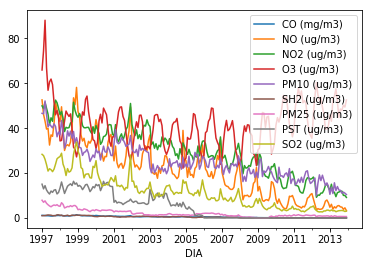

In [8]:
tsd.plot()

In [9]:
#Usaremos ARIMA porque el valor esta mas cercano al 0 y confirmar la correlacion
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
sm.stats.durbin_watson(tsd)

array([0.01004821, 0.03092454, 0.00794295, 0.01397779, 0.01313446,
       0.01980739, 0.01662734, 0.02103806, 0.02268878])

In [10]:
#Obtenemos las provincias y estaciones para plotear cada estacion, existen estaciones con el nombre incorrecto, asi que primero corregimos
zonas = pd.Categorical(st['PROVINCIA']+';'+st['ESTACIÓN'])
zonas_unicos = zonas.categories.unique()
print(zonas_unicos)

Index([u'BURGOS;Aranda de Duero', u'BURGOS;Aranda de Duero 2',
       u'BURGOS;Burgos 1', u'BURGOS;Burgos 2', u'BURGOS;Burgos 3',
       u'BURGOS;Burgos 4', u'BURGOS;Burgos 5', u'BURGOS;Burgos1',
       u'BURGOS;Burgos4', u'BURGOS;Burgos5', u'BURGOS;Medina de Pomar',
       u'BURGOS;Miranda de Ebro 1', u'BURGOS;Miranda de Ebro 2',
       u'BURGOS;Miranda de Ebro 3', u'BURGOS;Miranda de Ebro1',
       u'BURGOS;Miranda de Ebro2', u'LEÓN;La Robla', u'LEÓN;Lario',
       u'LEÓN;Leon 4', u'LEÓN;Leon3', u'LEÓN;Le�n 1', u'LEÓN;Le�n 2',
       u'LEÓN;Le�n 3', u'LEÓN;Le�n 4', u'LEÓN;Le�n1', u'LEÓN;Ponferrada 1',
       u'LEÓN;Ponferrada 2', u'LEÓN;Ponferrada 3', u'LEÓN;Ponferrada 4',
       u'LEÓN;Ponferrada 5', u'LEÓN;Ponferrada4', u'PALENCIA;Guardo',
       u'PALENCIA;Palencia 1', u'PALENCIA;Palencia 2', u'PALENCIA;Palencia 3',
       u'PALENCIA;Velilla del R�o Carri�n', u'PALENCIA;Venta de Ba�os',
       u'SALAMANCA;El Maillo', u'SALAMANCA;Salamanca 1',
       u'SALAMANCA;Salamanca 2', u'SAL

In [11]:
st['ESTACIÓN'] = st['ESTACIÓN'].replace('Burgos1','Burgos 1')
st['ESTACIÓN'] = st['ESTACIÓN'].replace('Burgos4','Burgos 4')
st['ESTACIÓN'] = st['ESTACIÓN'].replace('Burgos5','Burgos 5')

st['ESTACIÓN'] = st['ESTACIÓN'].replace('Miranda de Ebro1','Miranda de Ebro 1')
st['ESTACIÓN'] = st['ESTACIÓN'].replace('Miranda de Ebro2','Miranda de Ebro 2')

st['ESTACIÓN'] = st['ESTACIÓN'].replace('Le�n1','Le�n 1')
st['ESTACIÓN'] = st['ESTACIÓN'].replace('Leon3','Le�n 3')
st['ESTACIÓN'] = st['ESTACIÓN'].replace('Leon 4','Le�n 4')

st['ESTACIÓN'] = st['ESTACIÓN'].replace('Ponferrada4','Ponferrada 4')

st['ESTACIÓN'] = st['ESTACIÓN'].replace('Salamanca4','Salamanca 4')
st['ESTACIÓN'] = st['ESTACIÓN'].replace('Salamanca5','Salamanca 5')
st['ESTACIÓN'] = st['ESTACIÓN'].replace('Salamanca6','Salamanca 6')

In [12]:
#Obtenemos las provincias y estaciones
zonas = pd.Categorical(st['PROVINCIA']+';'+st['ESTACIÓN'])
zonas_unicos = zonas.categories.unique()
print(zonas_unicos)

Index([u'BURGOS;Aranda de Duero', u'BURGOS;Aranda de Duero 2',
       u'BURGOS;Burgos 1', u'BURGOS;Burgos 2', u'BURGOS;Burgos 3',
       u'BURGOS;Burgos 4', u'BURGOS;Burgos 5', u'BURGOS;Medina de Pomar',
       u'BURGOS;Miranda de Ebro 1', u'BURGOS;Miranda de Ebro 2',
       u'BURGOS;Miranda de Ebro 3', u'LEÓN;La Robla', u'LEÓN;Lario',
       u'LEÓN;Le�n 1', u'LEÓN;Le�n 2', u'LEÓN;Le�n 3', u'LEÓN;Le�n 4',
       u'LEÓN;Ponferrada 1', u'LEÓN;Ponferrada 2', u'LEÓN;Ponferrada 3',
       u'LEÓN;Ponferrada 4', u'LEÓN;Ponferrada 5', u'PALENCIA;Guardo',
       u'PALENCIA;Palencia 1', u'PALENCIA;Palencia 2', u'PALENCIA;Palencia 3',
       u'PALENCIA;Velilla del R�o Carri�n', u'PALENCIA;Venta de Ba�os',
       u'SALAMANCA;El Maillo', u'SALAMANCA;Salamanca 1',
       u'SALAMANCA;Salamanca 2', u'SALAMANCA;Salamanca 3',
       u'SALAMANCA;Salamanca 4', u'SALAMANCA;Salamanca 5',
       u'SALAMANCA;Salamanca 6', u'SEGOVIA;Segovia 1', u'SEGOVIA;Segovia 2',
       u'SORIA;Muriel de la Fuente', u'SORIA

In [13]:
#Para usar todos los gases, contabilizamos y sumamos en una columna total
st['TOTAL'] = st.sum(axis=1)

In [14]:
st

,CO (mg/m3),NO (ug/m3),NO2 (ug/m3),O3 (ug/m3),PM10 (ug/m3),SH2 (ug/m3),PM25 (ug/m3),PST (ug/m3),SO2 (ug/m3),PROVINCIA,ESTACIÓN,TOTAL
DIA,,,,,,,,,,,,
1997-01-01,1.2,12.0,33.0,63.0,56.0,0.0,0.0,0.0,19.0,ÁVILA,Ávila,184.2
1997-01-01,0.0,9.0,18.0,32.0,35.0,0.0,0.0,0.0,40.0,PALENCIA,Guardo,134.0
1997-01-01,2.0,17.0,54.0,86.0,32.0,0.0,0.0,0.0,13.0,SEGOVIA,Segovia 1,204.0
1997-01-01,1.8,40.0,32.0,26.0,93.0,12.0,0.0,0.0,21.0,BURGOS,Miranda de Ebro 1,225.8
1997-01-01,0.0,18.0,18.0,54.0,0.0,0.0,0.0,39.0,18.0,SALAMANCA,Salamanca 2,147.0
1997-01-01,0.0,10.0,15.0,57.0,51.0,0.0,0.0,0.0,23.0,PALENCIA,Velilla del R�o Carri�n,156.0
1997-01-01,0.0,31.0,44.0,9.0,36.0,0.0,0.0,0.0,37.0,LEÓN,Le�n 2,157.0
1997-01-01,1.2,43.0,54.0,29.0,124.0,0.0,0.0,0.0,32.0,LEÓN,Le�n 1,283.2
1997-01-01,0.9,27.0,28.0,33.0,48.0,0.0,0.0,0.0,11.0,PALENCIA,Venta de Ba�os,147.9


In [15]:
tsdT = st["TOTAL"].groupby(pd.Grouper(freq='M')).agg('mean')

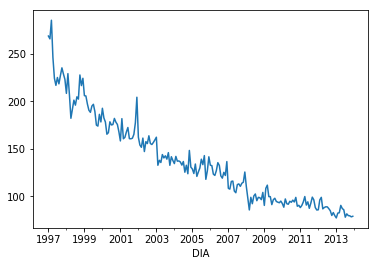

In [16]:
#Podemos ver que la serie de tiempo con el nuevo valor de total permanece constante
tsdT.plot()

In [17]:
#Usaremos ARIMA porque el valor esta mas cercano al 0 y confirmar la correlacion
sm.stats.durbin_watson(tsdT)

0.004828723314454039

BURGOS


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
/home/david/anaconda2/lib/python2.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/david/anaconda2/lib/python2.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/david/anaconda2/lib/python2.7/

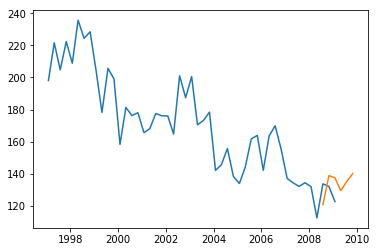

None
BURGOS


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


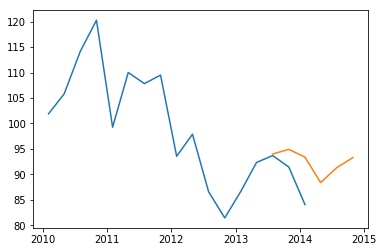

None
BURGOS


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


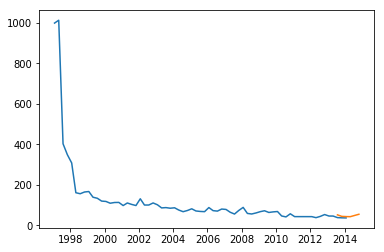

None
BURGOS


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


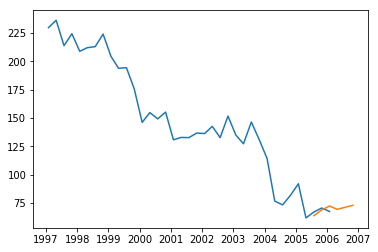

None
BURGOS


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


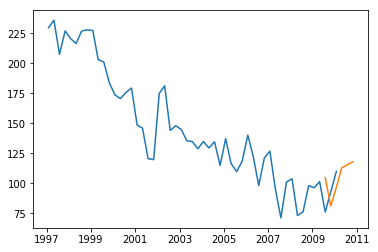

None
BURGOS


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


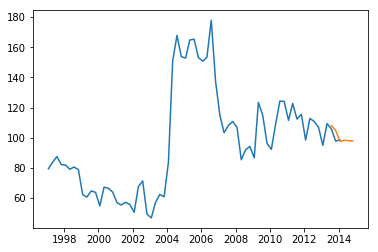

None
BURGOS


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


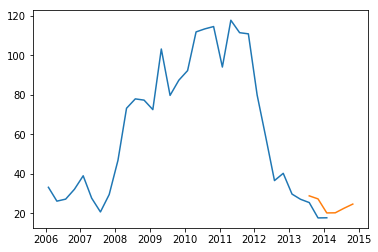

None
BURGOS


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


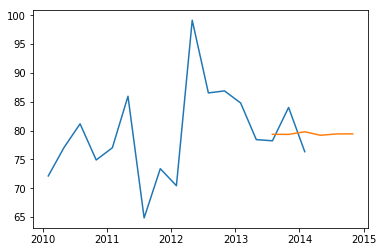

None
BURGOS


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


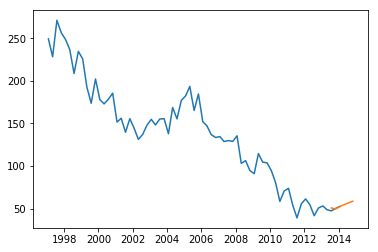

None
BURGOS


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


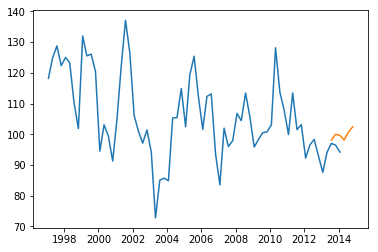

None
BURGOS


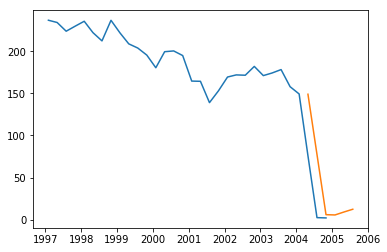

None
LEÓN


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


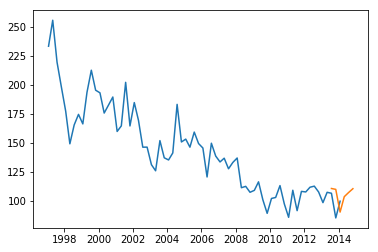

None
LEÓN


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


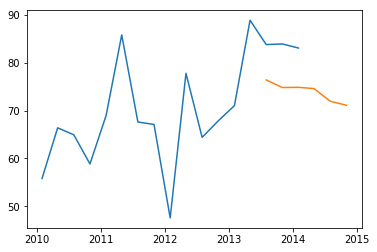

None
LEÓN


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


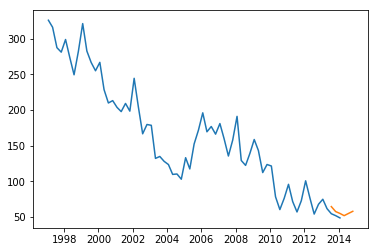

None
LEÓN


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


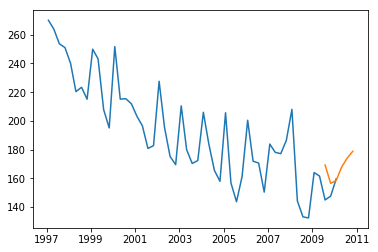

None
LEÓN


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


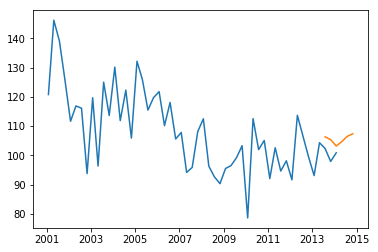

None
LEÓN


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


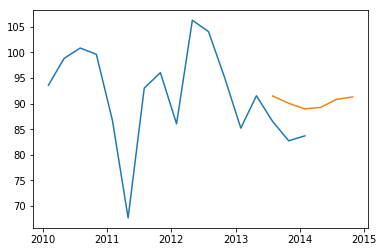

None
LEÓN


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


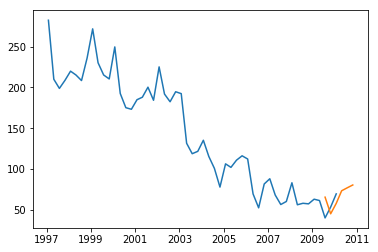

None
LEÓN


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


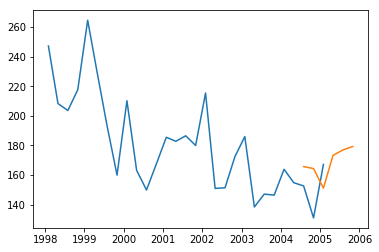

None
LEÓN


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


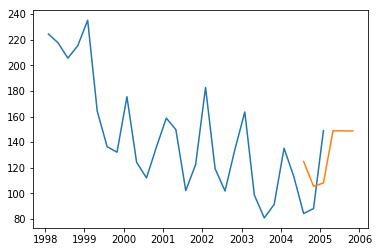

None
LEÓN


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


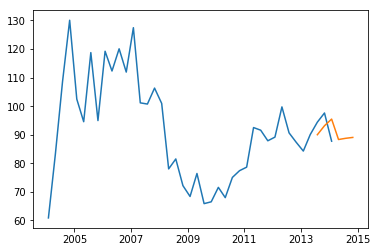

None
LEÓN


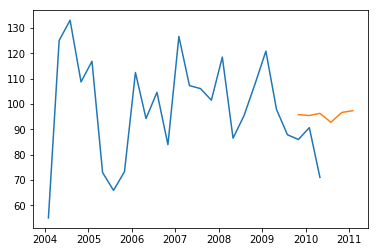

None
PALENCIA


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


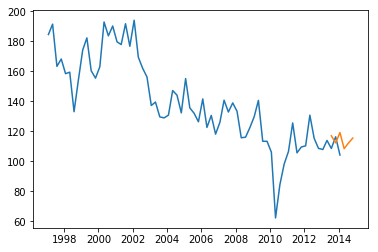

None
PALENCIA


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


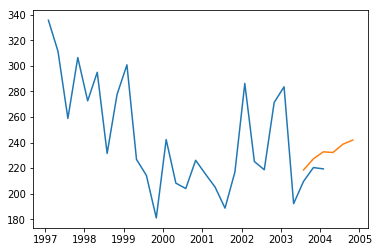

None
PALENCIA


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


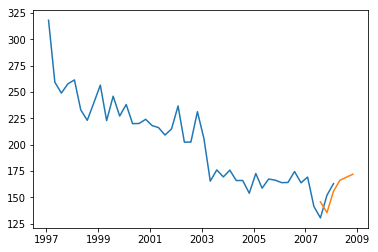

None
PALENCIA


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


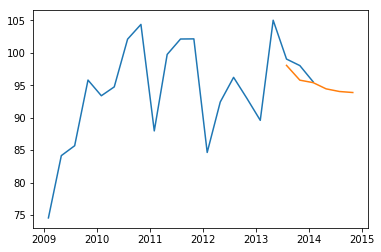

None
PALENCIA


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


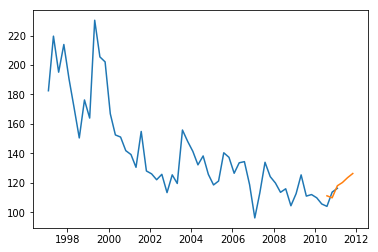

None
PALENCIA


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


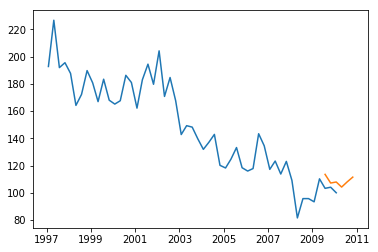

None
SALAMANCA


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


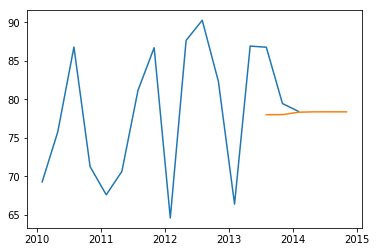

None
SALAMANCA


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


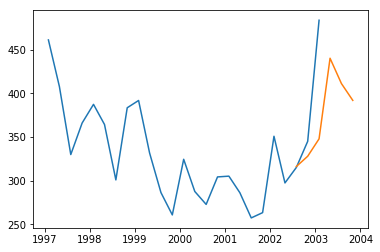

None
SALAMANCA


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


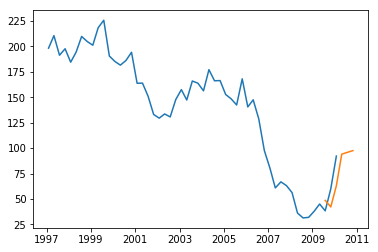

None
SALAMANCA


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


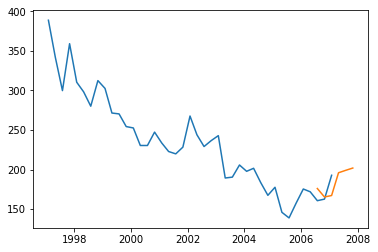

None
SALAMANCA


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


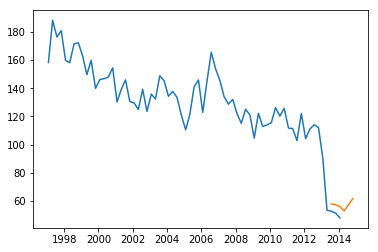

None
SALAMANCA


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


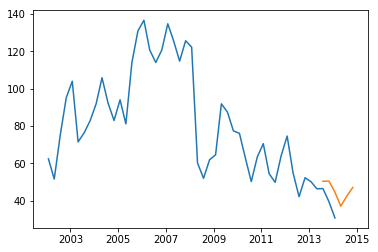

None
SALAMANCA


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


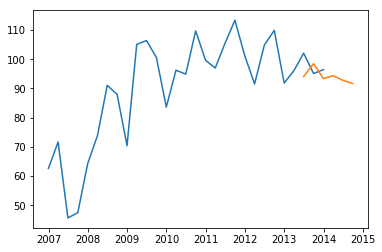

None
SEGOVIA


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


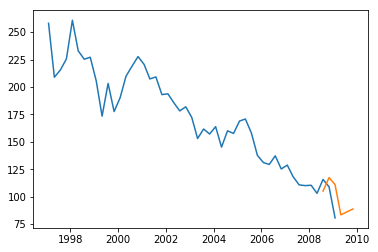

None
SEGOVIA


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


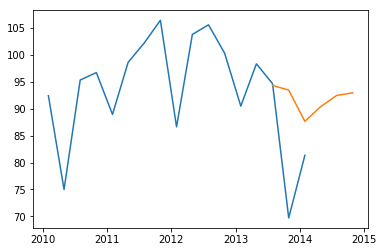

None
SORIA


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


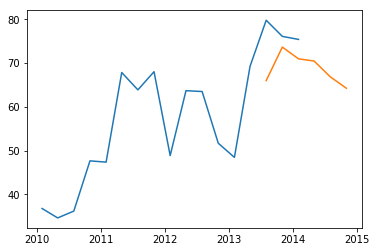

None
SORIA


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


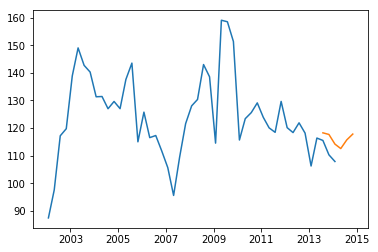

None
VALLADOLID


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


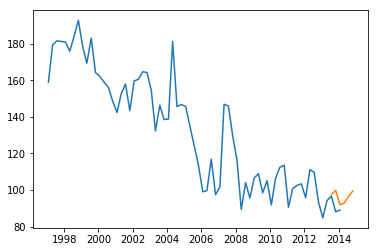

None
ZAMORA


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


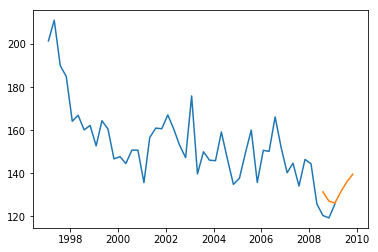

None
ZAMORA


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


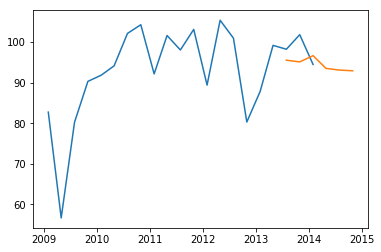

None
ÁVILA


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


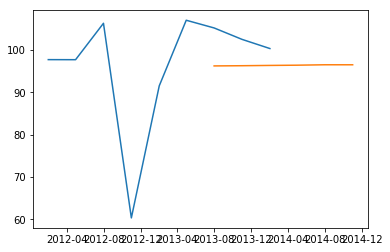

None
ÁVILA


/home/david/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


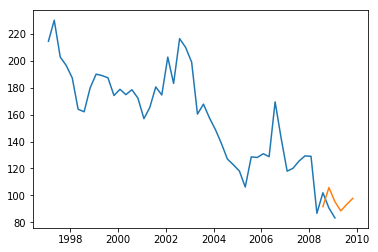

None


In [18]:
for i in zonas_unicos:
    x = i.split(';')
    print(x[0])
    dtt = st[(st['PROVINCIA'] == x[0]) & (st['ESTACIÓN'] == x[1])]
    tsdTP = dtt['TOTAL'].groupby(pd.Grouper(freq='3M')).agg('mean')
    tsdTP.interpolate(method='linear', inplace=True)
    model = ARIMA(tsdTP , order=(1,0,0))
    model_fit = model.fit()
    pred = model_fit.predict(start=tsdTP.shape[0]-3, end=tsdTP.shape[0]+2)
    plt.plot(tsdTP)
    plt.plot(pred)
    print(plt.show())